In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('Titanic-Dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#to Find the duplicate rows
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [33]:
#to identify the column data type
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Ticket', 'Cabin']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


In [34]:
#count the unique coloumns
df[cat_col].nunique()

Name      891
Ticket    681
Cabin     147
dtype: int64

In [35]:
#to calculate the missing rows
round((df.isnull().sum() / df.shape[0]) * 100, 2)

PassengerId      0.0
Survived         0.0
Pclass           0.0
Name             0.0
Sex            100.0
Age              0.0
SibSp            0.0
Parch            0.0
Ticket           0.0
Fare             0.0
Cabin           77.1
Embarked_Q       0.0
Embarked_S       0.0
dtype: float64

In [8]:
df1 = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df1.dropna(subset=['Embarked'], inplace=True)
df1['Age'].fillna(df1['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 889, dtype: float64

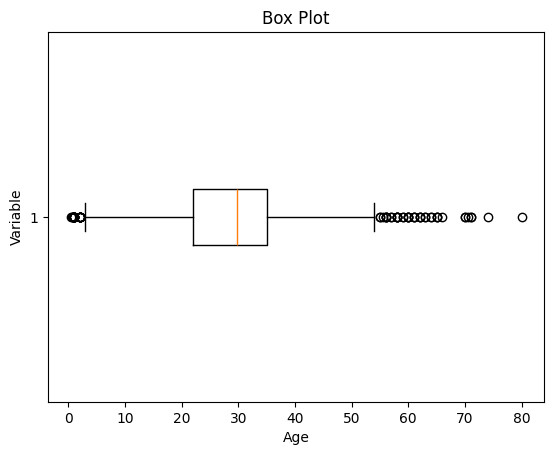

In [37]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [39]:
#Remove outlier from the updated data
mean = df1['Age'].mean()
std = df1['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

Lower Bound : 3.7167137521696105
Upper Bound : 55.59017898917889


In [41]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # Label encoding for 'Sex'
df = pd.get_dummies(df, columns=['Fare'], drop_first=True) # One-hot encoding for 'Fare'


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'SibSp']] = scaler.fit_transform(df[['Age', 'SibSp']])


In [42]:
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris  NaN -0.592481      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN  0.638789      1   
2                             Heikkinen, Miss. Laina  NaN -0.284663      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN  0.407926      1   
4                           Allen, Mr. William Henry  NaN  0.407926      0   

   Parch            Ticket Cabin  ...  Fare_2.441497778832105  \
0      0         A/5 21171   NaN  ...                   False   
1      0          PC 17599   C85  ...                   False   
2      0  STON/O2. 3101282   NaN  ...                   False   
3      0            113803  C123  ...                 